# Laboratory practice № 6 (Nyquist criterion and delayed systems)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter

In [2]:
dt = 0.001

In [3]:
def plot_time_characteristics(W_sys, time_arr,title, x_form = None):
    ir = ctrl.impulse_response(W_sys,time_arr).outputs
    sr = ctrl.step_response(W_sys,time_arr).outputs
    
    fig, ax = plt.subplots(1,2,figsize=(12, 5))
    fig.suptitle(f"Time characteristics for {title}")
    
    ax[0].plot(time_arr,ir,'r--',label="Modeling",linewidth=2)
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_title("Weight function (impulse response)")
    ax[0].set_xlabel("$t$")
    ax[0].set_ylabel("$y(t)$")
    
    ax[1].plot(time_arr,sr,'r--',label="Modeling",linewidth=2)
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_title("Step response")
    ax[1].set_xlabel("$t$")
    ax[1].set_ylabel("$y(t)$")
    
    if x_form is not None:
        ax[0].xaxis.set_major_formatter(x_form)
        ax[1].xaxis.set_major_formatter(x_form)

## Task 1 (Nyquist godograph)

In [4]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))

In [5]:
s = ctrl.tf([1,0],[1])

In [6]:
sys_den = (s-1)*(s-2)*(s-3)*(s-4)*(s+5)
sys_closed_den = (s+7)*(s+8)*(s+9)*(s+10)*(s-6)
sys_num = sys_closed_den - sys_den
W_1 = sys_num/sys_den
W_1

TransferFunction(array([    33,    242,   -297,  -9218, -30360]), array([   1,   -5,  -15,  125, -226,  120]))

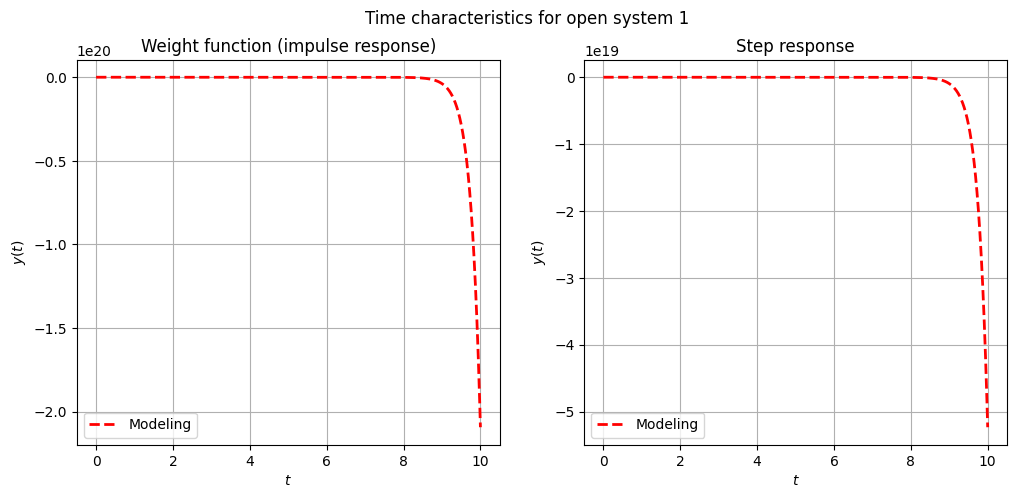

In [7]:
plot_time_characteristics(W_1,time_1,"open system 1")

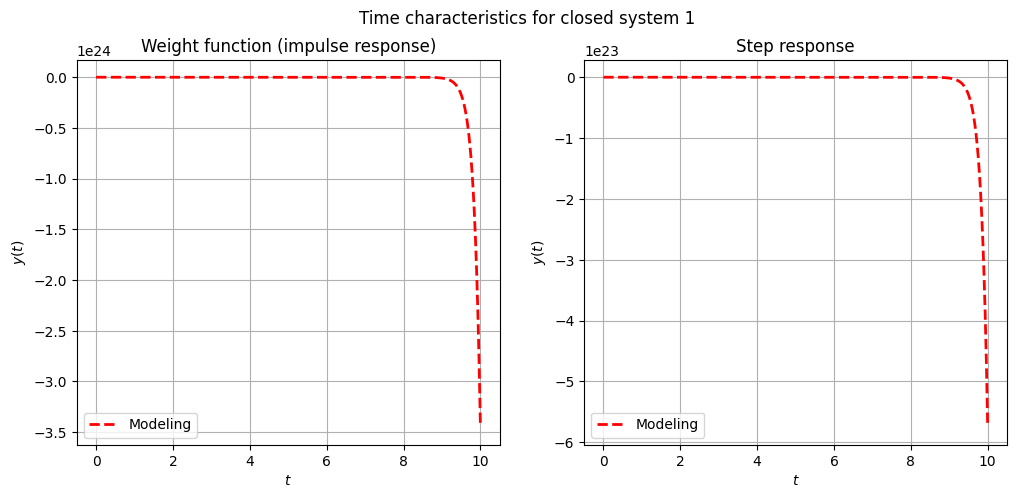

In [8]:
plot_time_characteristics(ctrl.feedback(W_1),time_1,"closed system 1")

-3

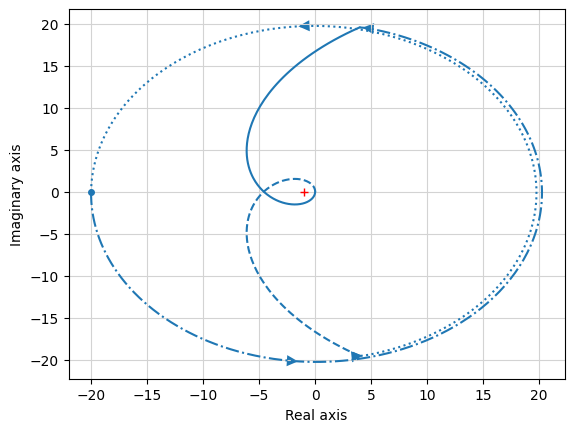

In [9]:
ctrl.nyquist(W_1)

In [10]:
sys_den = (s+1)*(s+2)*(s+3)*(s+4)*(s+5)
sys_closed_den = (s+7)*(s+8)*(s+9)*(s+10)*(s-6)
sys_num = sys_closed_den - sys_den
W_2 = sys_num/sys_den
W_2

TransferFunction(array([    13,    142,   -397,  -9718, -30360]), array([  1,  15,  85, 225, 274, 120]))

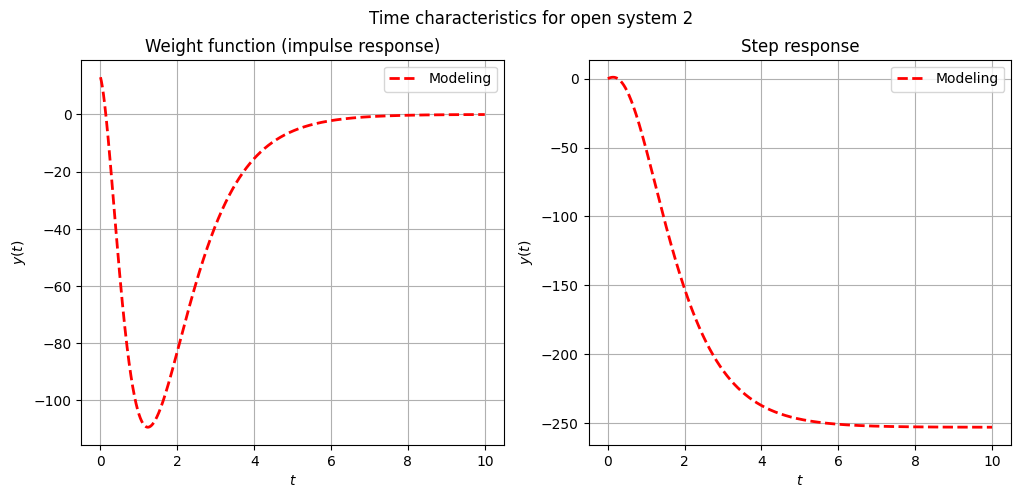

In [11]:
plot_time_characteristics(W_2,time_1,"open system 2")

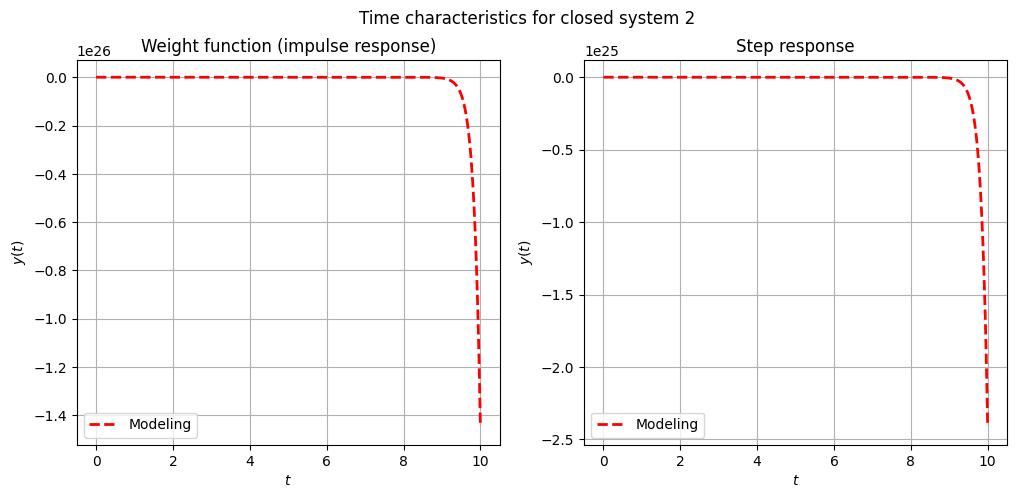

In [12]:
plot_time_characteristics(ctrl.feedback(W_2),time_1,"closed system 2")

1

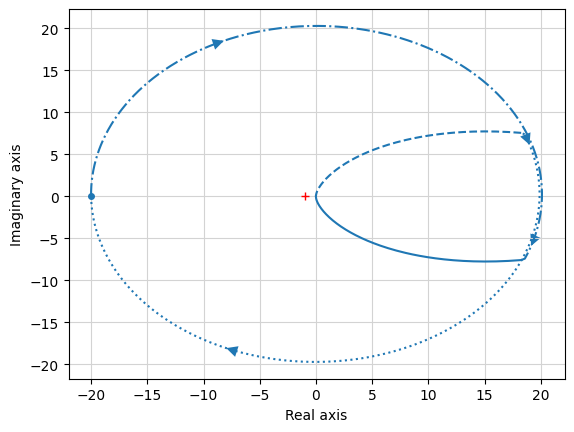

In [13]:
ctrl.nyquist(W_2)

In [14]:
sys_den = (s-1)*(s-2)*(s-3)*(s-4)*(s+5)
sys_closed_den = (s+7)*(s+8)*(s+9)*(s+10)*(s+6)
sys_num = sys_closed_den - sys_den
W_3 = sys_num/sys_den
W_3

TransferFunction(array([   45,   650,  4875, 19750, 30120]), array([   1,   -5,  -15,  125, -226,  120]))

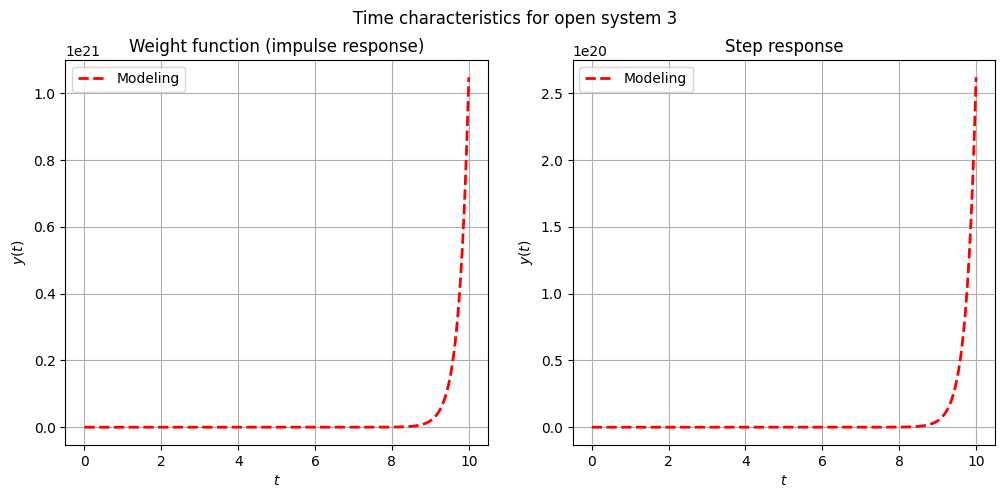

In [15]:
plot_time_characteristics(W_3,time_1,"open system 3")

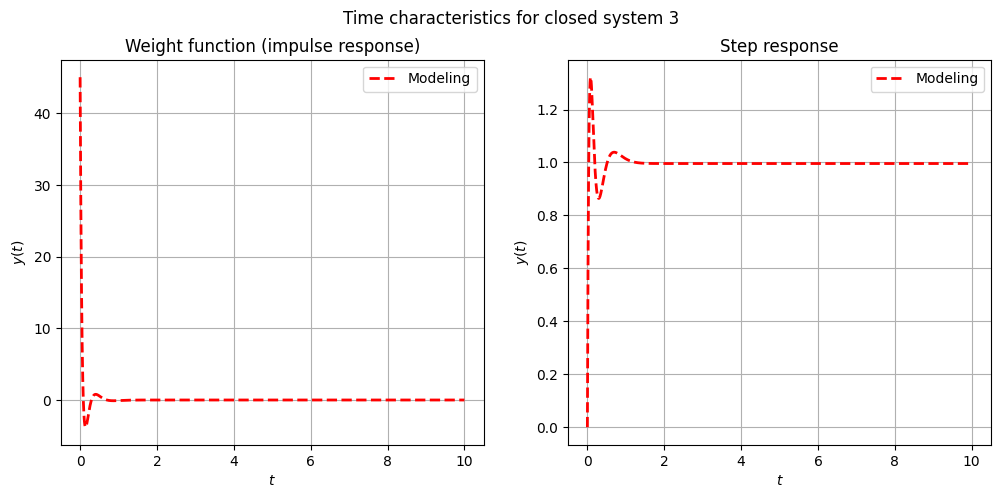

In [16]:
plot_time_characteristics(ctrl.feedback(W_3),time_1,"closed system 3")

-4

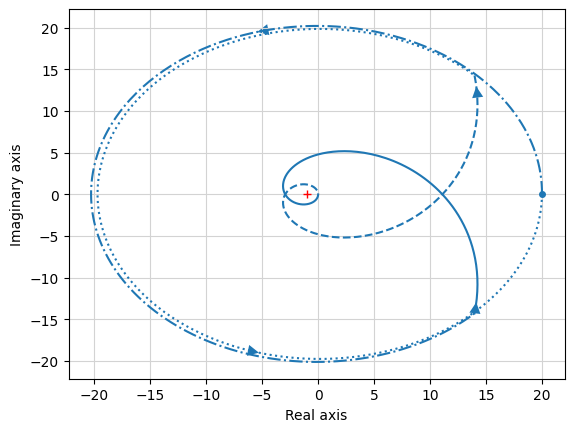

In [17]:
ctrl.nyquist(W_3)

## Task 2 (Gain)

In [18]:
W_1 = (s-1)/(s**2+6*s+5)

0

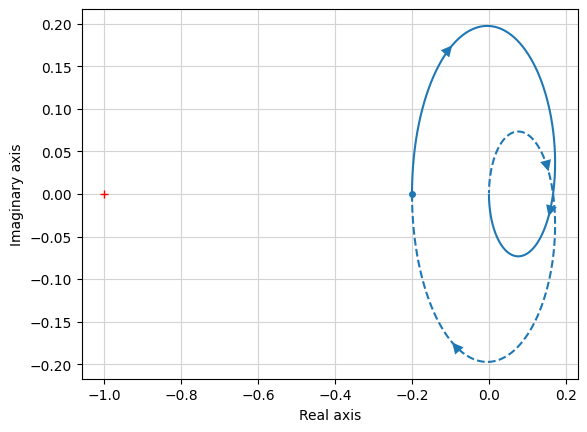

In [19]:
ctrl.nyquist(W_1)

0

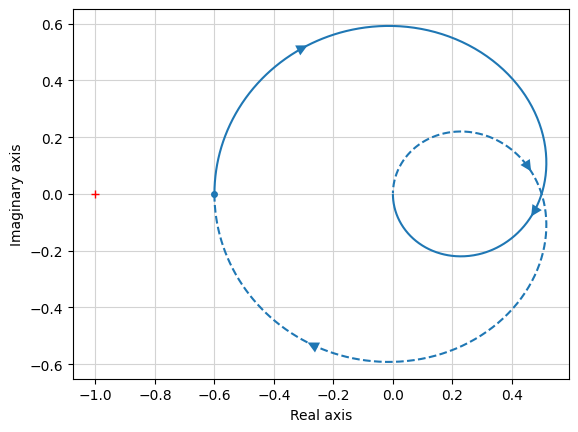

In [20]:
ctrl.nyquist(W_1*3)

1

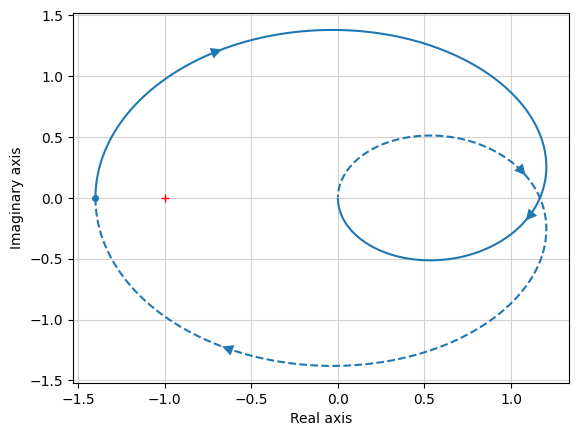

In [21]:
ctrl.nyquist(W_1*7)

In [22]:
ctrl.stability_margins(W_1)

(5.0, inf, inf, 0.0, nan, nan)

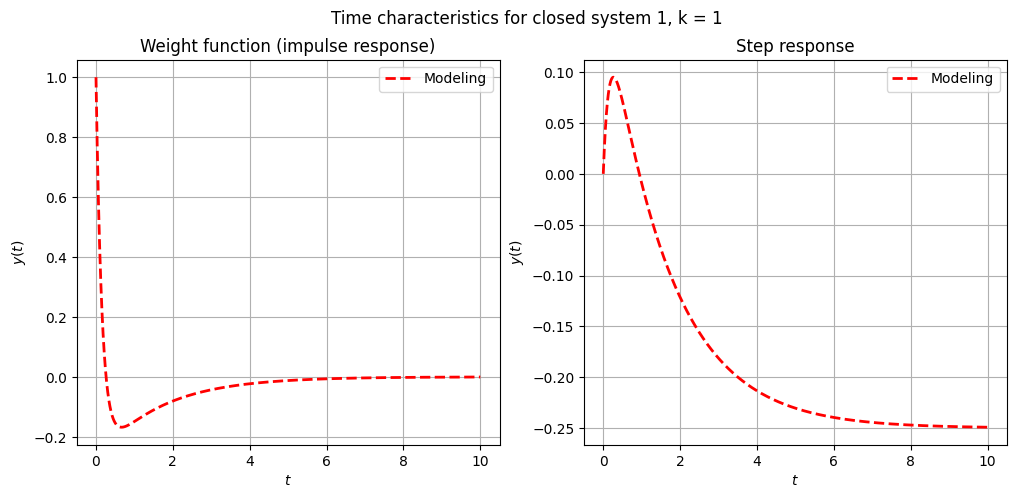

In [23]:
plot_time_characteristics(ctrl.feedback(W_1),time_1,"closed system 1, k = 1")

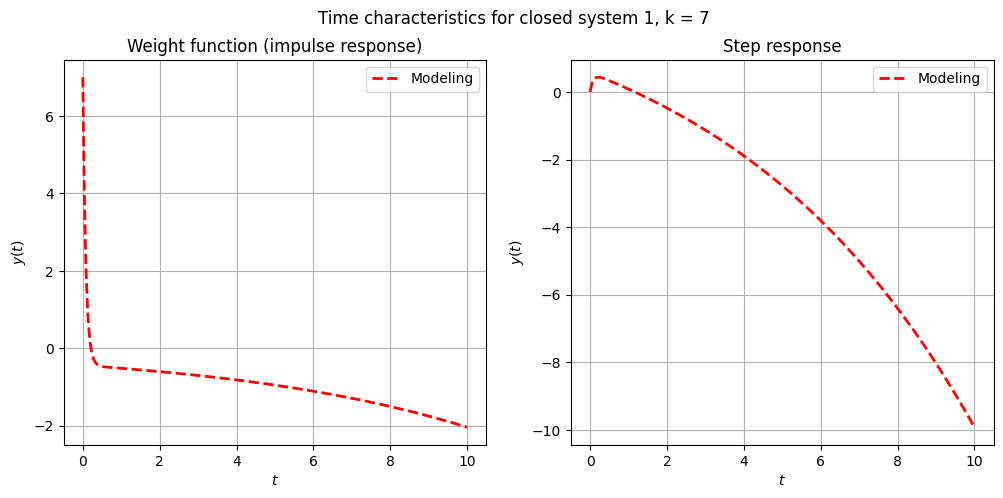

In [24]:
plot_time_characteristics(ctrl.feedback(W_1*7),time_1,"closed system 1, k = 7")

In [25]:
W_2 = (-9*s**3 + 16*s**2 - 6*s)/(10*s**3+12*s**2+5*s+1)
W_2

TransferFunction(array([-9, 16, -6,  0]), array([10, 12,  5,  1]))

/home/vladislav/.pyenv/versions/3.10.11/envs/control/lib/python3.10/site-packages/control/freqplot.py:943: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(


2

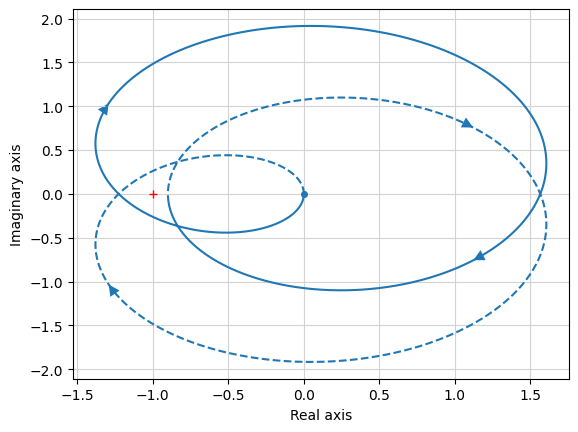

In [26]:
ctrl.nyquist(W_2)

0

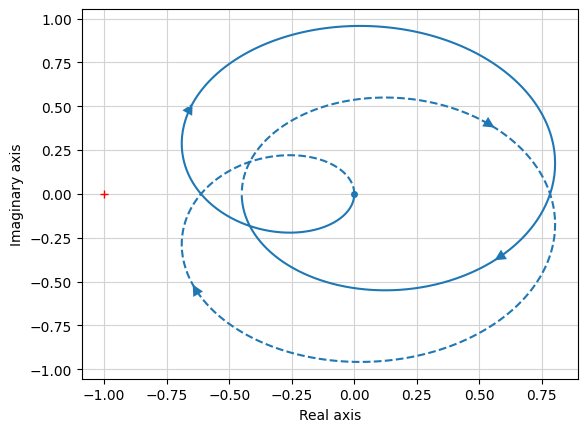

In [27]:
ctrl.nyquist(W_2*0.5)

3

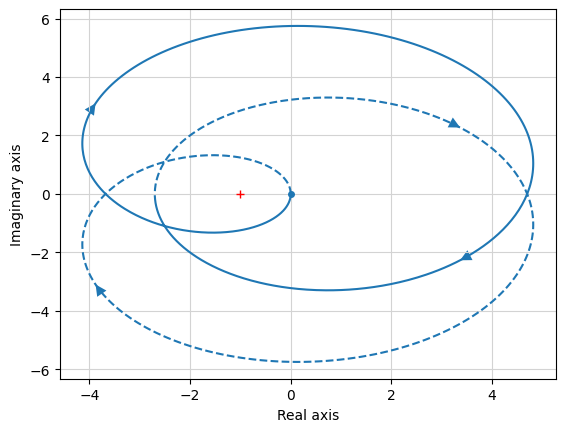

In [28]:
ctrl.nyquist(W_2*3)

/home/vladislav/.pyenv/versions/3.10.11/envs/control/lib/python3.10/site-packages/control/timeresp.py:1834: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


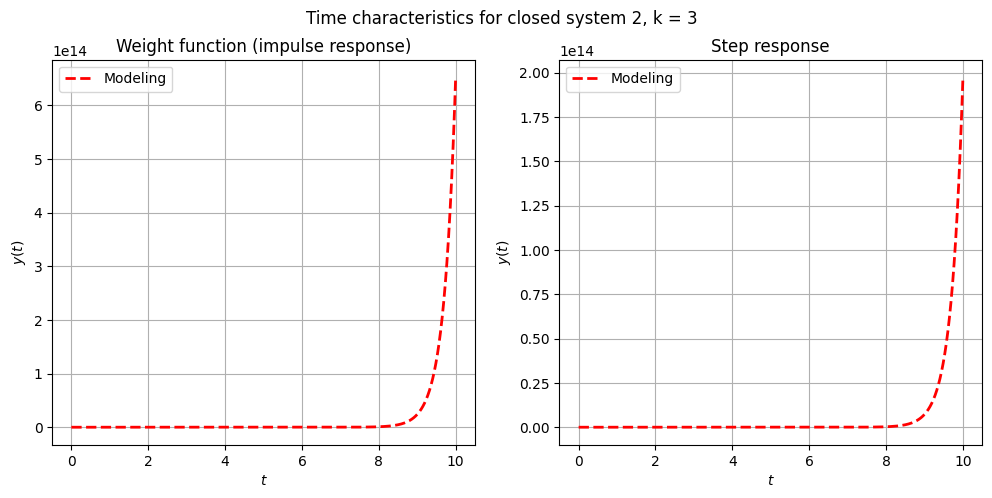

In [29]:
plot_time_characteristics(ctrl.feedback(W_2*3),time_1,"closed system 2, k = 3")

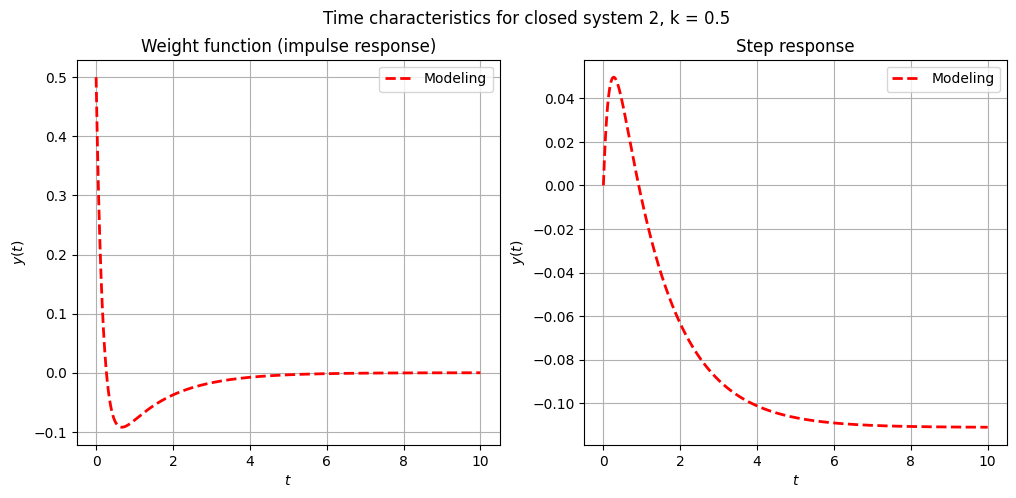

In [30]:
plot_time_characteristics(ctrl.feedback(W_1*0.5),time_1,"closed system 2, k = 0.5")

In [31]:
ctrl.stability_margins(W_2)

(0.8156406696019232,
 17.182094382223454,
 0.18616599365094968,
 0.19979929965491522,
 0.16277451311794117,
 0.18730505095813837)

### Task 3 (Delay)

In [32]:
W_3 = (5*s+10)/(s**2 + 4)
W_3

TransferFunction(array([ 5, 10]), array([1, 0, 4]))

0

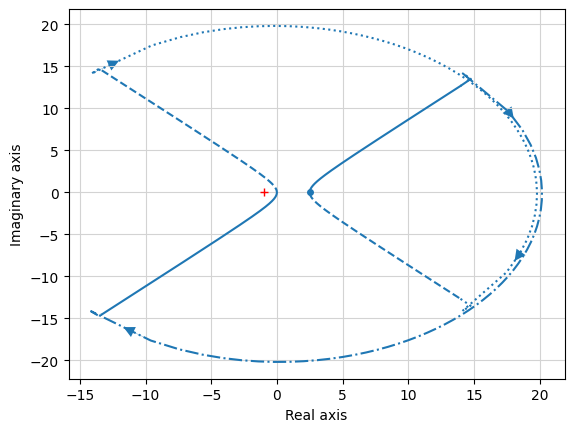

In [33]:
ctrl.nyquist(W_3)

2

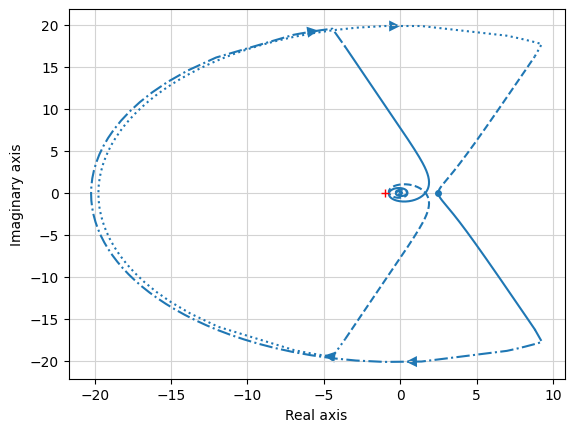

In [34]:
ctrl.nyquist(ctrl.tf(*ctrl.pade(1,6))*W_3)

2

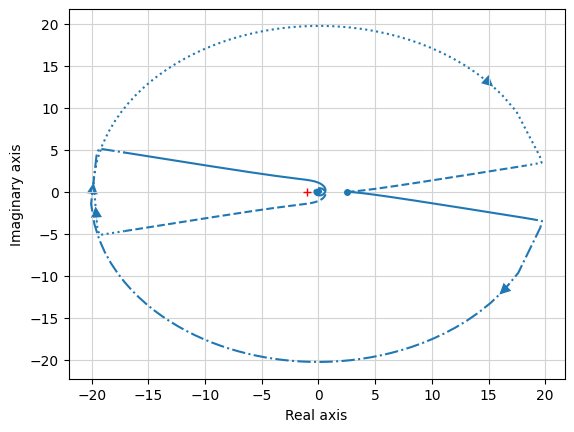

In [35]:
ctrl.nyquist(ctrl.tf(*ctrl.pade(0.5,6))*W_3)

In [36]:
res = ctrl.stability_margins(W_3)
print(res)
np.deg2rad(res[1]) / (res[4])

(1.25607396694702e-16, 71.41390399944888, inf, 2.0000000000000004, 5.947653830560157, nan)


0.20956292884586752

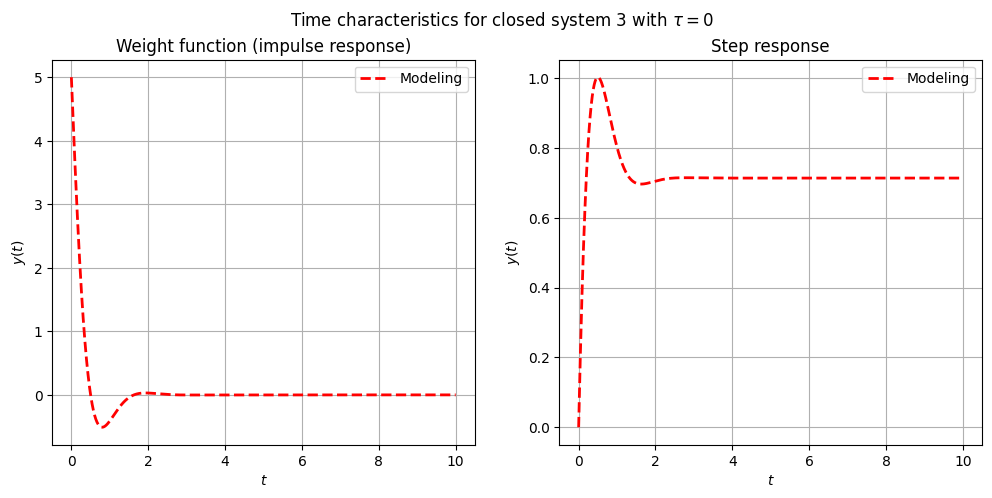

In [37]:
plot_time_characteristics(ctrl.feedback(W_3),time_1,"closed system 3 with $\\tau=0$")

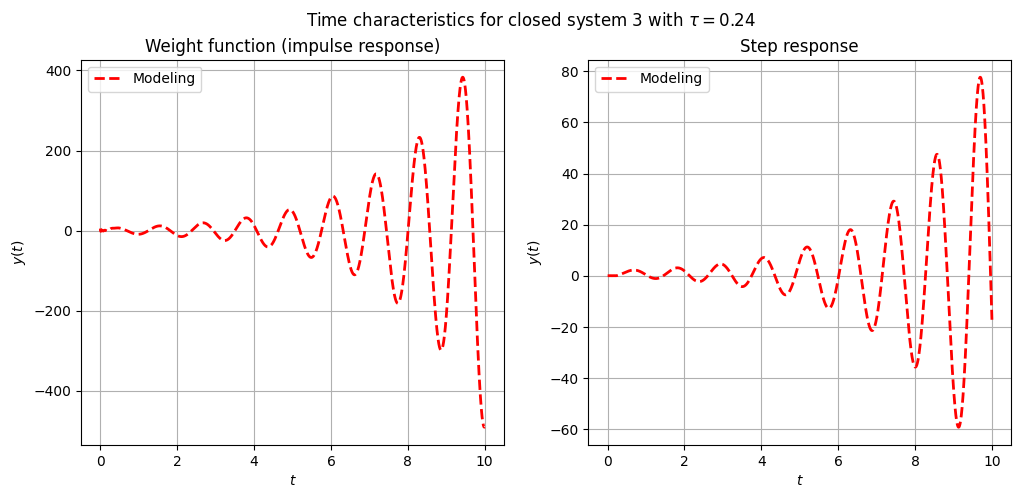

In [38]:
plot_time_characteristics(ctrl.feedback(ctrl.tf(*ctrl.pade(0.24,6))*W_3),time_1,"closed system 3 with $\\tau=0.24$")

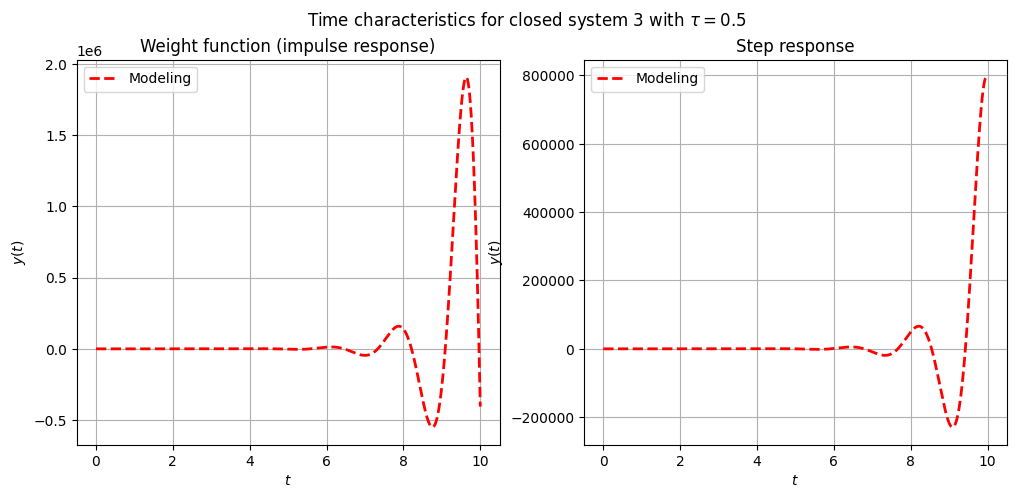

In [39]:
plot_time_characteristics(ctrl.feedback(ctrl.tf(*ctrl.pade(0.5,6))*W_3),time_1,"closed system 3 with $\\tau=0.5$")

In [40]:
W_4 = (8*s**2+4*s-12)/(10*s**2-10*s+18)
W_4

TransferFunction(array([  8,   4, -12]), array([ 10, -10,  18]))

In [41]:
res = ctrl.stability_margins(W_4)
print(res)
np.deg2rad(res[1]) / (res[4])

(1.5, 14.745531118124063, 0.20534440830549883, 0.0, 0.6298588668369673, 0.5141000430535863)


0.4085964039197377

0

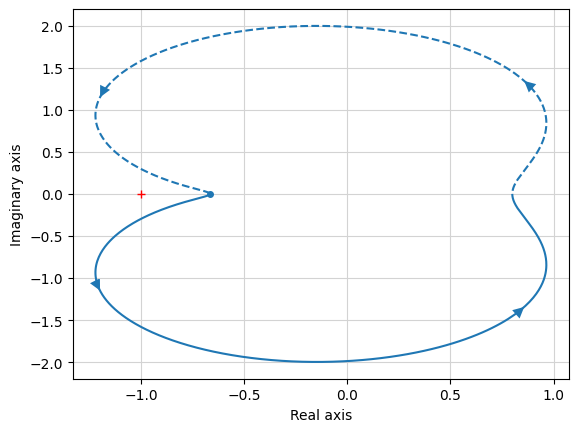

In [42]:
ctrl.nyquist(W_4)

0

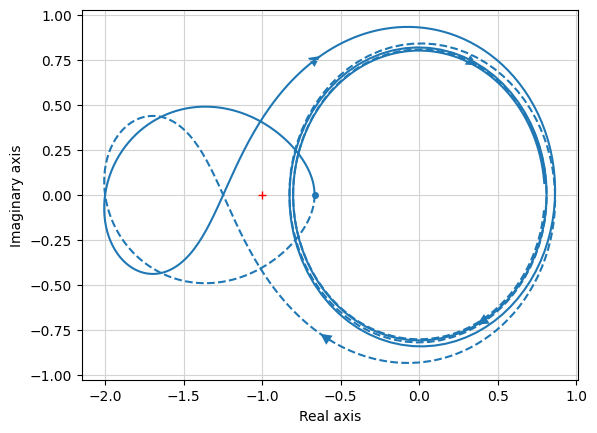

In [43]:
ctrl.nyquist(ctrl.tf(*ctrl.pade(1,6))*W_4)

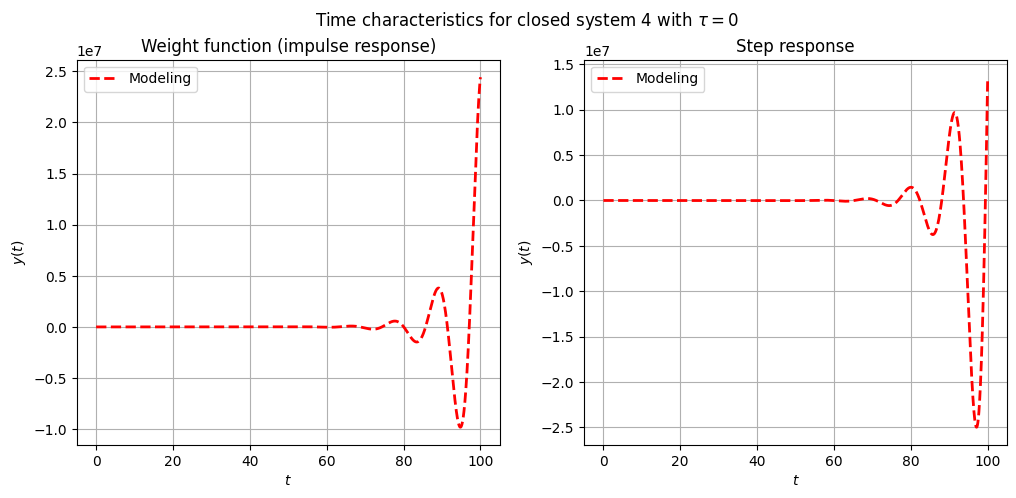

In [44]:
plot_time_characteristics(ctrl.feedback(W_4),np.linspace(0,100,int(100/dt)),"closed system 4 with $\\tau=0$")

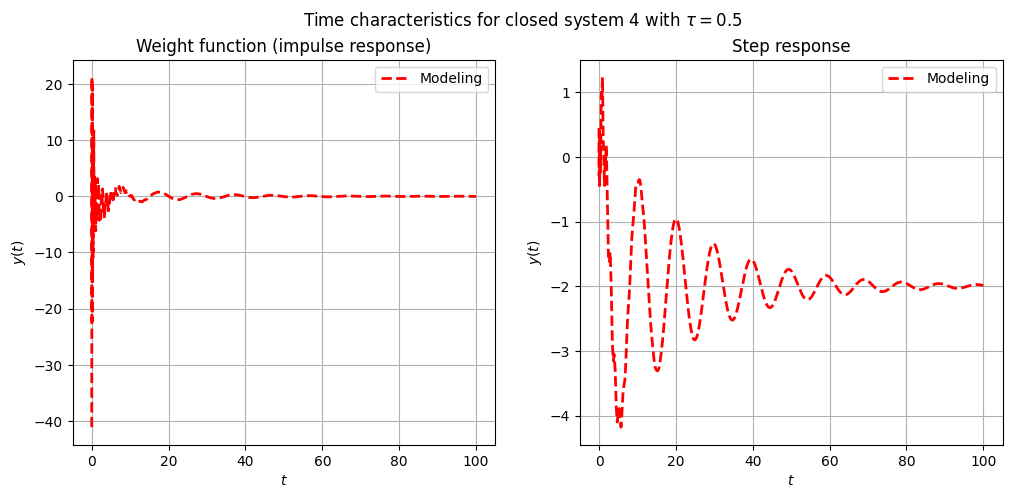

In [45]:
plot_time_characteristics(ctrl.feedback(ctrl.tf(*ctrl.pade(0.5,6))*W_4),np.linspace(0,100,int(100/dt)),"closed system 4 with $\\tau=0.5$")